#### Historical weather data from São Carlos, São Paulo, Brazil.
##### Years: 2010 to 2019.
##### Data source: National Weather Institute (http://www.inmet.gov.br)
##### I used this database in my master's degree in Transportation Systems Planning, at the University of São Paulo (USP).
##### Master's Dissertation available from: https://teses.usp.br/teses/disponiveis/18/18144/tde-07072016-200409/en.php

In [1]:
# Importing the data.

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:,.1f}".format

NewData = pd.read_csv('_New2010-2019_withNaN_MinTemp.csv')

NewData['Month'] = pd.to_datetime(NewData['Date']).dt.strftime('%m')
NewData['Month'] += pd.to_datetime(NewData['Date']).dt.strftime('%b')

NewData = NewData[['Date','Month','Year','Season','Rain (mm)',
                   'Max Temp (°C)','Min Temp (°C)']]

NewData

,Date,Month,Year,Season,Rain (mm),Max Temp (°C),Min Temp (°C)
0,2010-01-01,01Jan,2010,Summer,0.4,29.5,19.6
1,2010-01-02,01Jan,2010,Summer,11.6,29.0,19.8
2,2010-01-03,01Jan,2010,Summer,0.2,31.3,19.5
3,2010-01-04,01Jan,2010,Summer,0.0,31.2,20.0
4,2010-01-05,01Jan,2010,Summer,0.0,31.1,21.1
...,...,...,...,...,...,...,...
3647,2019-12-27,12Dec,2019,Summer,0.0,32.2,19.7
3648,2019-12-28,12Dec,2019,Summer,9.0,32.1,20.6
3649,2019-12-29,12Dec,2019,Summer,0.0,31.3,19.8
3650,2019-12-30,12Dec,2019,Summer,0.0,30.3,20.2


In [2]:
# Reshaping the table for some graphs.

NewDataMax = NewData.copy()
NewDataMax['type'] = 'Max Temp'
NewDataMax.rename(columns={'Max Temp (°C)':'Temperature (°C)'}, inplace=True)
del NewDataMax['Min Temp (°C)']
NewDataMin = NewData.copy()
NewDataMin['type'] = 'Min Temp'
NewDataMin.rename(columns={'Min Temp (°C)':'Temperature (°C)'}, inplace=True)
del NewDataMin['Max Temp (°C)']
temp = [NewDataMin,NewDataMax]
NewData2 = pd.concat(temp)
NewData2

,Date,Month,Year,Season,Rain (mm),Temperature (°C),type
0,2010-01-01,01Jan,2010,Summer,0.4,19.6,Min Temp
1,2010-01-02,01Jan,2010,Summer,11.6,19.8,Min Temp
2,2010-01-03,01Jan,2010,Summer,0.2,19.5,Min Temp
3,2010-01-04,01Jan,2010,Summer,0.0,20.0,Min Temp
4,2010-01-05,01Jan,2010,Summer,0.0,21.1,Min Temp
...,...,...,...,...,...,...,...
3647,2019-12-27,12Dec,2019,Summer,0.0,32.2,Max Temp
3648,2019-12-28,12Dec,2019,Summer,9.0,32.1,Max Temp
3649,2019-12-29,12Dec,2019,Summer,0.0,31.3,Max Temp
3650,2019-12-30,12Dec,2019,Summer,0.0,30.3,Max Temp


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


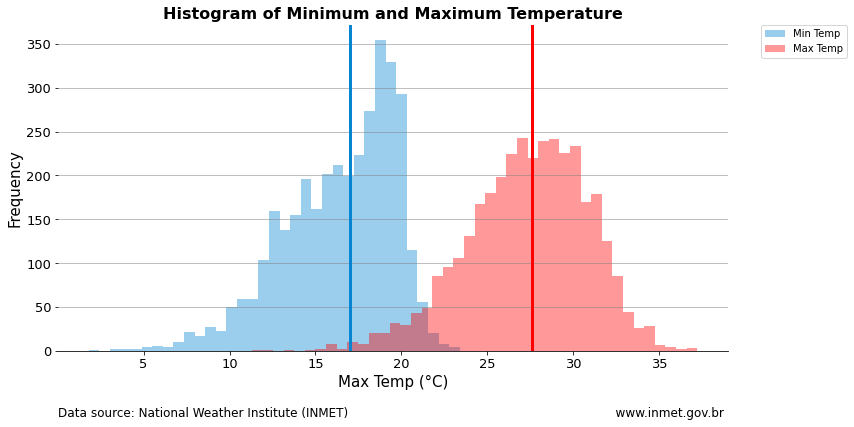

In [3]:
# Plotting a histogram of the minimum and maximum temperature.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ax = sns.distplot(NewData['Min Temp (°C)'], color='#0485d1', 
                  kde=False, label='Min Temp')
ax = sns.distplot(NewData['Max Temp (°C)'], color='red', 
                  kde=False, label='Max Temp')

ax.set_title('Histogram of Minimum and Maximum Temperature', 
             fontsize=16, weight='bold')
ax.set_xlabel('Max Temp (°C)', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.tick_params(labelsize=13)

median1 = NewData['Max Temp (°C)'].median()
plt.axvline(median1, color='red', linewidth=3)
median2 = NewData['Min Temp (°C)'].median()
plt.axvline(median2, color='#0485d1', linewidth=3)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=0, y=-75, s='Data source: National Weather Institute (INMET)'+
        ' '*69+'www.inmet.gov.br', fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

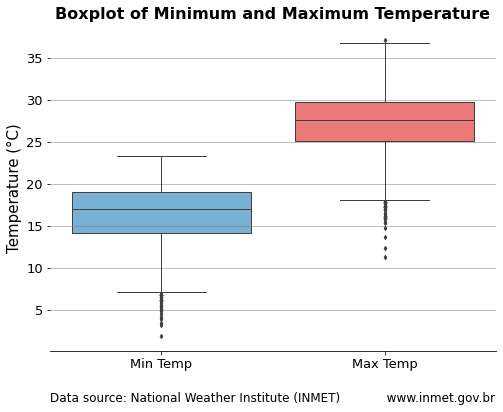

In [4]:
# Plotting a boxplot of the minimum and maximum temperature.

plt.figure(figsize=(8,6))

color_dict = dict({'Max Temp':'red', 'Min Temp':'#0485d1'})

ax = sns.boxplot(x='type', y='Temperature (°C)', data=NewData2, palette=color_dict, 
                 linewidth=1, fliersize=3)

ax.axes.set_title('Boxplot of Minimum and Maximum Temperature', 
                  fontsize=16, weight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Temperature (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-6, s='Data source: National Weather Institute (INMET)'+
        ' '*12+'www.inmet.gov.br', fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

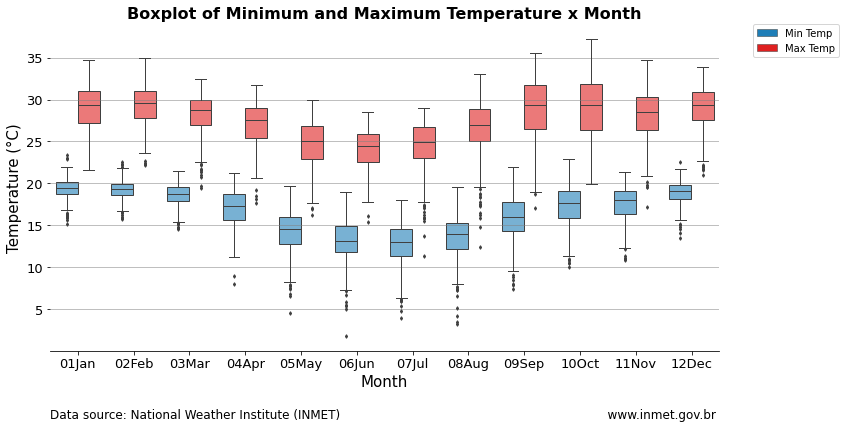

In [5]:
# Plotting a boxplot of the minimum and maximum temperature x season.

plt.figure(figsize=(12,6))

color_dict = dict({'Max Temp':'red', 'Min Temp':'#0485d1'})

ax = sns.boxplot(x='Month', y='Temperature (°C)', hue='type', data=NewData2, 
                 palette=color_dict, linewidth=1, fliersize=2.5)

ax.axes.set_title('Boxplot of Minimum and Maximum Temperature x Month', 
                  fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Temperature (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-8, s='Data source: National Weather Institute (INMET)'+
        ' '*69+'www.inmet.gov.br', fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

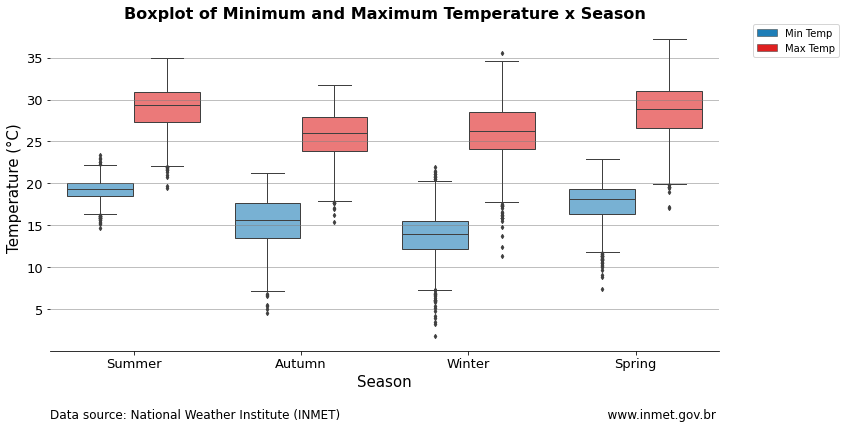

In [6]:
# Plotting a boxplot of the minimum and maximum temperature x season.

plt.figure(figsize=(12,6))

seasons = ['Summer','Autumn','Winter','Spring']

color_dict = dict({'Max Temp':'red', 'Min Temp':'#0485d1'})

ax = sns.boxplot(x='Season', y='Temperature (°C)', hue='type', 
                 data=NewData2, palette=color_dict, 
                 linewidth=1, order=seasons, fliersize=3)

ax.axes.set_title('Boxplot of Minimum and Maximum Temperature x Season', 
                  fontsize=16, weight='bold')
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel('Temperature (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-8, s='Data source: National Weather Institute (INMET)'+
        ' '*69+'www.inmet.gov.br', fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

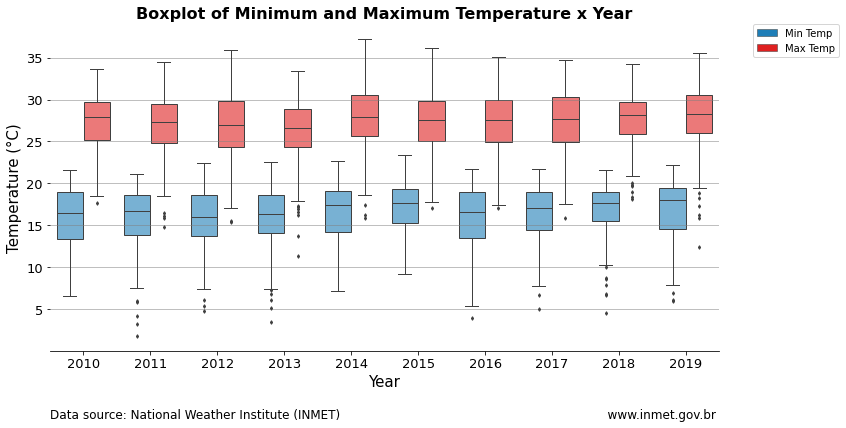

In [7]:
# Plotting a boxplot of the minimum and maximum temperature x year.

plt.figure(figsize=(12,6))

olor_dict = dict({'Max Temp':'red', 'Min Temp':'#0485d1'})

ax = sns.boxplot(x='Year', y='Temperature (°C)', hue='type', 
                 data=NewData2, palette=color_dict, 
                 linewidth=1, fliersize=2.5)

ax.axes.set_title('Boxplot of Minimum and Maximum Temperature x Year', 
                  fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Temperature (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-8, s='Data source: National Weather Institute (INMET)'+
        ' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [8]:
# Estimating the correlation between the temperatures.

corr = NewData['Max Temp (°C)'].corr(NewData['Min Temp (°C)'])
print('Correlation between Maximum and Minimum Temperature:', corr)

Correlation between Maximum and Minimum Temperature: 0.5980948649073179


In [9]:
# Estimating the linear regression model with the maximum and minimum temperature
# (dependent and independent variable, respectively).

import statsmodels.api as sm

x = NewData['Min Temp (°C)'].dropna()
y = NewData['Max Temp (°C)'].dropna()
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print('Coefficient of determination (R²):', results.rsquared)
print('Parameters:', results.params)

Coefficient of determination (R²): 0.35771746742850286
Parameters: [16.68043144  0.64831546]


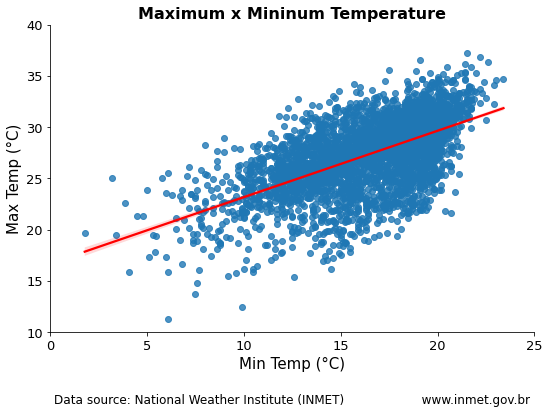

In [10]:
# Plotting the linear regression model with the maximum and minimum temperature
# (dependent and independent variable, respectively).

sns.lmplot(x='Min Temp (°C)', y='Max Temp (°C)', data=NewData, 
           line_kws={'color': 'red'}, height=5, aspect=1.5)
ax = plt.gca()

ax.set_title('Maximum x Mininum Temperature', fontsize=16, weight='bold')
ax.set_xlabel('Min Temp (°C)', fontsize=15)
ax.set_ylabel('Max Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.text(x=0.2, y=3, s='Data source: National Weather Institute (INMET)'+
        ' '*20+'www.inmet.gov.br', 
        fontsize=12)

plt.ylim(10, 40)
plt.xlim(0, 25)

plt.show()

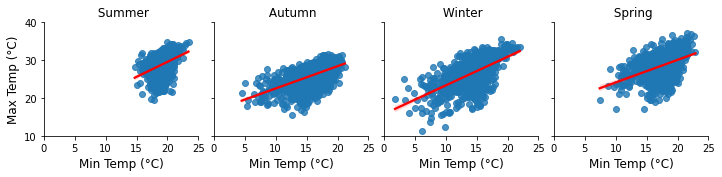

In [11]:
# Plotting the linear regression models filtered by seasons.

g = sns.lmplot(x='Min Temp (°C)', y='Max Temp (°C)', col='Season', 
           data=NewData, height=2.5, aspect=1, line_kws={'color': 'red'})

g.set(xlim=(0,25), ylim=(10,40), xticks=[0,5,10,15,20,25], yticks=[10,20,30,40])
g.fig.subplots_adjust(wspace=.1, hspace=.2)

for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='large')

    if ax.texts:
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],
                transform=ax.transAxes,
                va='center',
                fontsize='large')
        ax.texts[0].remove()

plt.show()



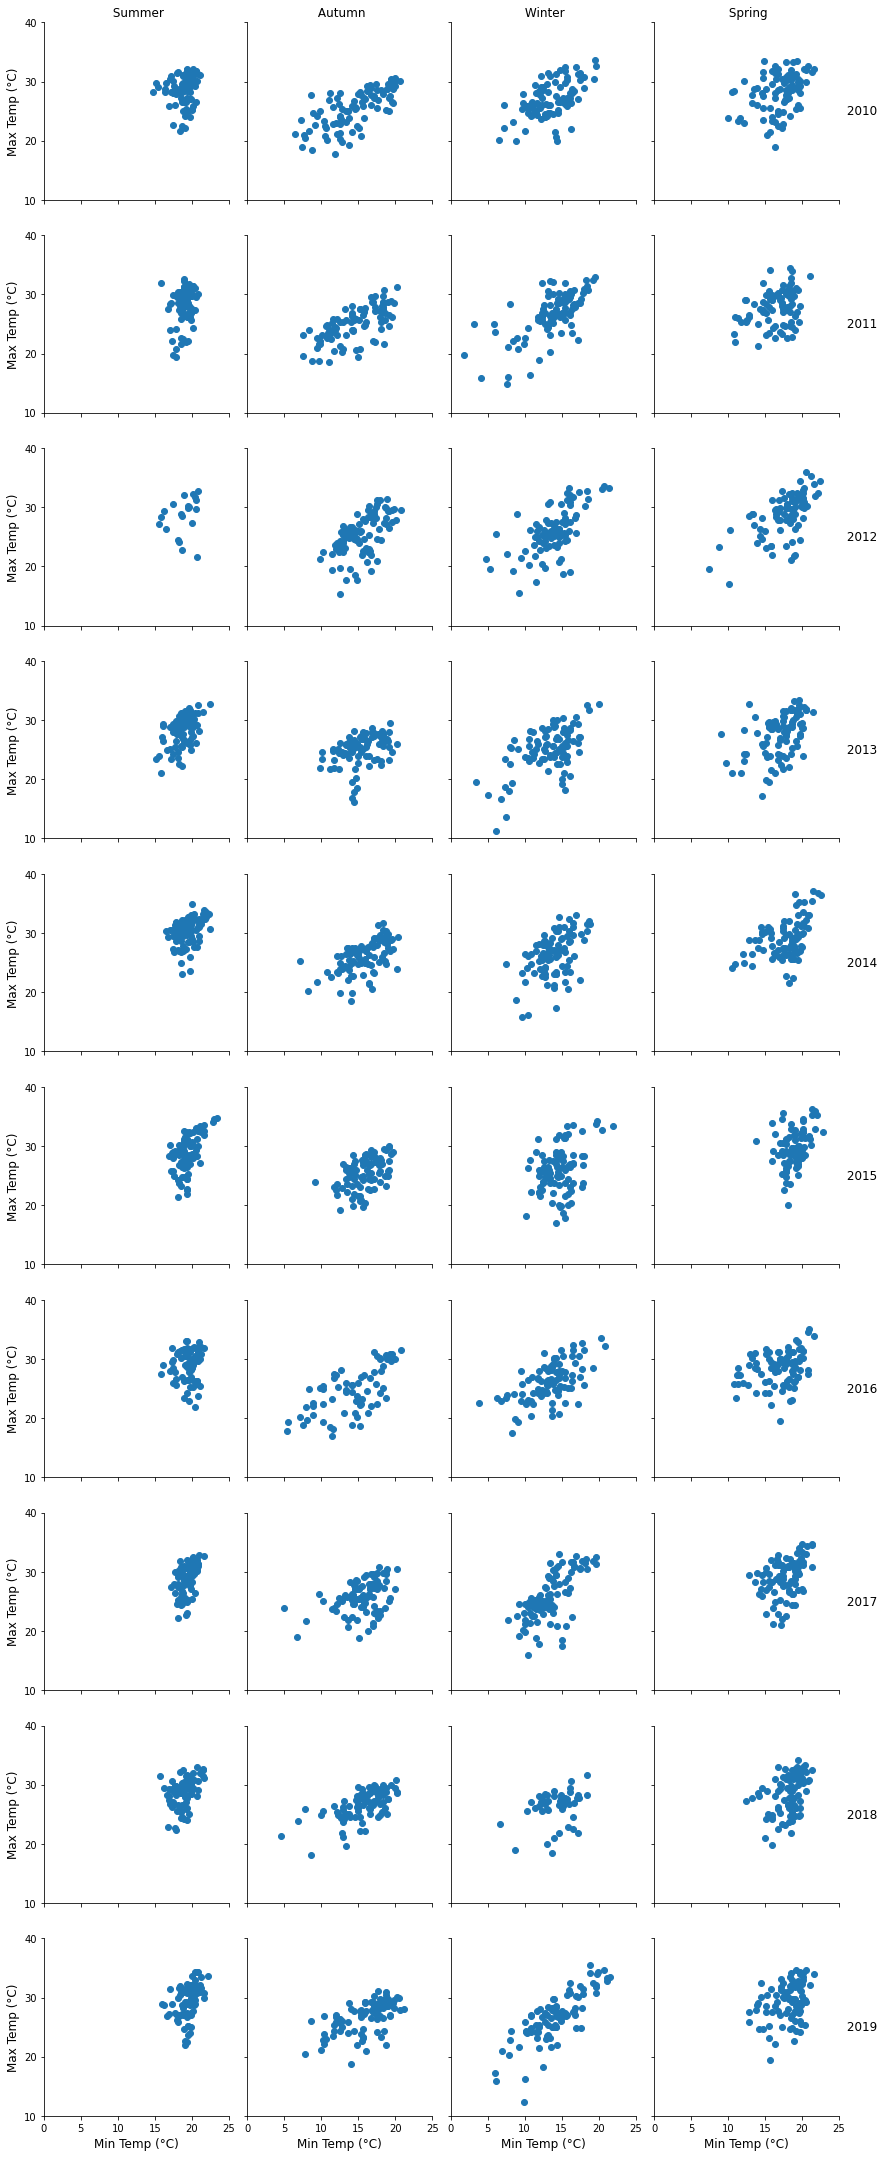

In [12]:
# Plotting the linear regression models filtered by seasons and years.

g = sns.FacetGrid(NewData, col='Season', row='Year', margin_titles=True)
g = g.map(plt.scatter, 'Min Temp (°C)', 'Max Temp (°C)')

g.set(xlim=(0,25), ylim=(10,40), xticks=[0,5,10,15,20,25], yticks=[10,20,30,40])
g.fig.subplots_adjust(wspace=.1, hspace=.2)

for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='large')

    if ax.get_title():
        ax.set_title(ax.get_title().split('Season =')[-1],
                     fontsize='large')

    if ax.texts:
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],
                transform=ax.transAxes,
                va='center',
                fontsize='large')
        ax.texts[0].remove()